# Inlämningsuppgift 4 -
Mattias Kallman 2019

# 1. Skapa en ljudfil i excel
På lektionen visade Dennis en demo över hur ljud lagras på datorn och hur man kan modifiera och visualisera ljud och dess innehåll i Octave. Demon kunde likväl ha utförts med pandas men signal paketet för Octave underlättar och visst är det bra att ni får se även det programmet utöver jupyter notebooks.

Uppgiften är simpel. Skapa en ljudfil t.ex 1 sekund lång där du spelar ett C-accord.

Skapa tre sinusvågor med numpy i jupyter notebook, och addera ihop dem för att skapa ett vackert C-accord (​https://en.wikibooks.org/wiki/Music_Theory/Chords​) med tre toner enligt kromatiska skalan (​https://en.wikipedia.org/wiki/Chromatic_scale​).


Rita en linjegraf för att se på vågformen för att försäkra dig om att det du skapar ser ut som det vi söker. (kolla numpy & matplotlib tutorialen lektion 6)
Minns att ljudsampel per sekund definierar vad vi kallar Sample Rate.

Märk att längden av np.arrayn måste vara minst dubbelt sampelfrekvensen för att du ska kunna skapa en ton (​Nyquist​). Använd typiska sampelrater som 8000hz eller 16khz.

Skapa en tidsskala enligt passande sampelrat. Minns du hur längden av vår busy.dat var beroende av sampelraten?
Exportera dina två arrays som kolumner antingen i en .csv fil eller motsvarande textformat.

Lägg till de två raderna som krävs för att textfilen ska bli en lämplig .dat fil (kolla exemplet från lektionen ifall du inte minns) och konvertera sedan filen till en wav fil med Sox.

Öppna filen och lyssna på den ljuva harmonin du skapat med numpy!
(Det är inte hela världen ifall du inte förstår dig på det människokonstruerade konceptet “tonalitet”. 

Make atonal music (​https://www.youtube.com/watch?v=JEY9lmCZbIc​) great again. Du får skapa sinusvågar med vad som helst för svängningsrater, bara det är tre separata toner.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

### Jag börjar med att räkna ut 3 toners sinusvåge för att sedan kunna sammaslå dem ihop till ett akord.

In [2]:
# Variables used to calculate sine waves

rate = (2*np.pi) #rate adjustment
amp = 0.8 # amplitude
x = np.linspace(0,1,16000) # time

# Calculating c4, e4 and g4
y_c4 = np.sin(262*rate*x)*amp # c4 at ~262 hertz
y_e4 = np.sin(330*rate*x)*amp # e4 at ~330 hertz
y_g4 = np.sin(392*rate*x)*amp # g4 at ~392 hertz

# Combinding all three notes into one chord
chord = (y_c4 + y_e4 + y_g4)/3 # chord there notes above


# make into tuple to save on processing 
data = (x, chord)

# shortening the list samples to make better visualisation of the sine waves.
cut_rate = 500
x2 = x[:cut_rate]
y2_c = y_c4[:cut_rate]
y2_e = y_e4[:cut_rate]
y2_g = y_g4[:cut_rate]
chord2 =((y2_c + y2_e + y2_g)/3)

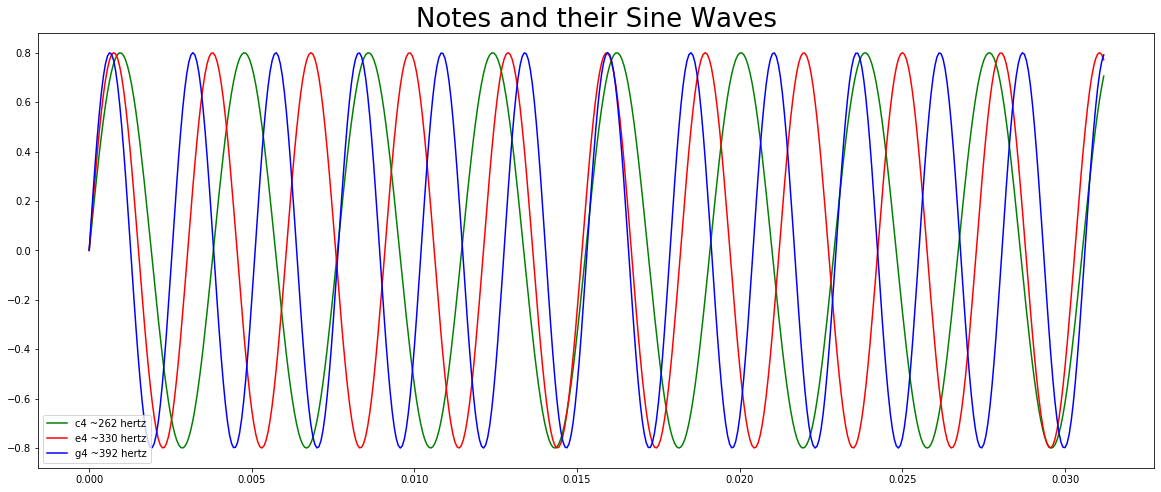

In [3]:
plt.figure(figsize=(20,8))
plt.plot(x2, y2_c, "-g", label="c4 ~262 hertz")
plt.plot(x2, y2_e, "-r", label="e4 ~330 hertz")
plt.plot(x2, y2_g, "-b", label="g4 ~392 hertz")
plt.legend()
plt.title('Notes and their Sine Waves', fontsize=26)
plt.show()


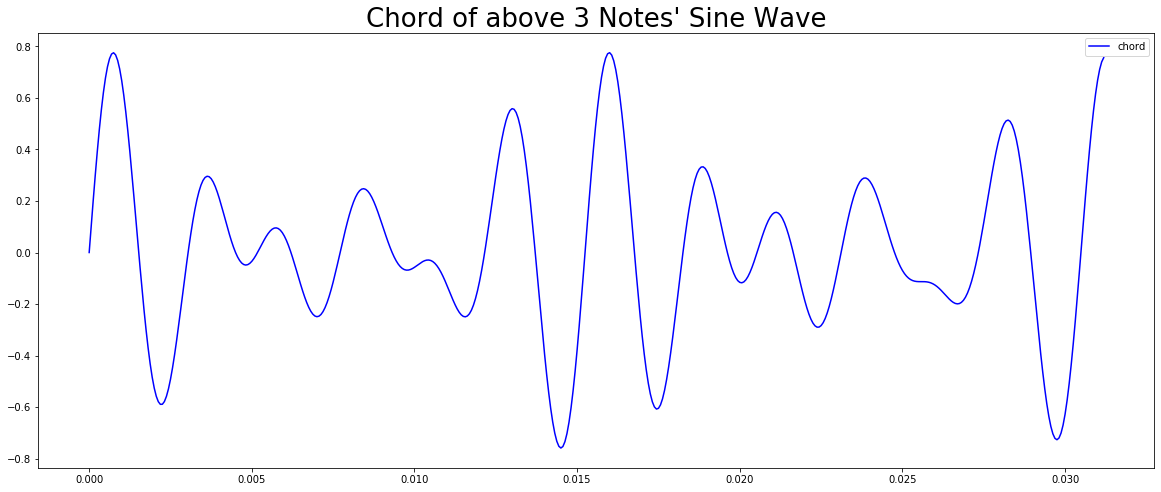

In [4]:
plt.figure(figsize=(20,8))
plt.plot(x2, chord2, "-b", label="chord")
plt.legend()
plt.title('Chord of above 3 Notes\' Sine Wave', fontsize=26)
plt.show()

### Nu har vi vårt akord och vill skapa en .dat fil. Vi gör det genom att köra create_dat_file() metoden jag har skapat nedan. Metoden spara en 'chord.dat' i lokala mappen.

In [5]:
def create_dat_file(data):
    """Writes chord data list to .dat format so it can be converted with sox to .mp3 format"""
    
    # converting to pandas dataframe
    df_data = pd.DataFrame(data)
    
    f = open("chord.dat","w+")
    f.write("; Sample Rate 16000\n; Channels 1\n")
    for i in df_data:
        f.write("{} {}\n" .format(df_data[i][0], df_data[i][1])) # first element: time, second element: frequency
    f.close()

In [6]:
# Run Method and create dat file of chord
create_dat_file(data=data)

### Till sist kör vi i terminalen kommandot: 'sox chord.dat chord.mp3' och vi har skapat en mp3 som spelar vårt akord.

en kopia på chord.mp3 finns med i projektmappen

# 2. RGB komposition
Skapa en färgbild genom att kombinera luminanskanalerna av kabuto (elr valfri poke)
Ladda in de tre kanalerna som skilda arrays och kombinera dem till en “rgb array” som du sedan visualiserar med imshow.

In [7]:
# Reading in the image of pokemon
image = img.imread('poke.jpg')
# Converting from float to int values
image_int = np.int_(image*255)

# Selecting the dragon part of the image
dragon_img = image[0:66,327:400,:]

# Extracting the RGB channels from the image
dragon_red = dragon_img[:,:,0]
dragon_green = dragon_img[:,:,1]
dragon_blue = dragon_img[:,:,2]

In [8]:
# Checking the shape of the image so we know how to reasemble the rgb channels later
dragon_img.shape

(66, 73, 3)

In [9]:
def combined_rgb_channels():
    """method that combines rgb luminance channels to return true color image"""
    
    # R G B Color channels variables
    r = dragon_red.ravel()
    g = dragon_green.ravel()
    b = dragon_blue.ravel()

    # Using list comprehension to reapply all color channels to 
    dragon_rgb = [[a,b,c] for a,b,c in list(zip(r,g,b))]
    dragon_rgb = np.array(dragon_rgb)
    # Reshaping the data so that the rgb pixels overlay each other and create true color apperance
    dragon_rgb = dragon_rgb.reshape(66,73,3)
    
    # Returns a rgb color array
    return dragon_rgb

### Här skapar vi en en metod som illustrerar bilddatan:

In [10]:
def display_picture_luminance_channels():
    fig = plt.figure(figsize=(16,8))
    original = fig.add_subplot(1,5,1)
    plt.imshow(dragon_img)
    original.set_title('Original')
    plt.axis("off")
    
    r = fig.add_subplot(1,5,2)
    plt.imshow(dragon_red,cmap="Reds")
    r.set_title('R Channel')
    plt.axis("off")
    
    g = fig.add_subplot(1,5,3)
    plt.imshow(dragon_green,cmap="Reds")
    g.set_title('G Channel')
    plt.axis("off")
    
    b = fig.add_subplot(1,5,4)
    plt.imshow(dragon_blue,cmap="Reds")
    b.set_title('B Channel')
    plt.axis("off")
    
    rgb = fig.add_subplot(1,5,5)
    plt.imshow(combined_rgb_channels())
    rgb.set_title('RGB Combined')
    plt.axis("off")
    
    plt.show()

### Här ser vi resultatet av att kombinera rgb luminanskanalerna.

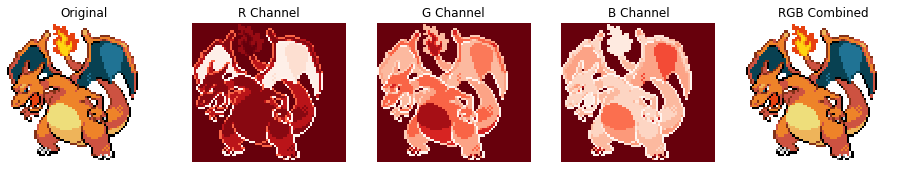

In [11]:
display_picture_luminance_channels()

# 3. Göm information i bilder
Ladda ner fabio från IL, och göm en hälsning i alphakanalen av bilden (t.ex texten “tjenix”).
1. Gör en jupyter notebook där du visar hur man får fram informationen:
- Använd dig av ett histogram för att illustrera var den gömda datan ligger
2. Gör en before/after figur med imshow och pseudofärg där meddelande syns


In [12]:
# Import picture of Fabio
fabio = img.imread('fabio64.png')
# Convert array values to rgba int
fabio = np.int_(fabio*255)
# Checking shape
fabio.shape

(64, 64, 4)

In [13]:
def display_pic_rgba(pic):
    """Method for displaying luminance channel information about image fabio64.png"""
    
    # Original piture
    fig = plt.figure(figsize=(16,8))
    original = fig.add_subplot(1,5,1)
    plt.imshow(pic)
    original.set_title('Original')
    plt.axis("off")
    
    # R Channel
    r = fig.add_subplot(1,5,2)
    plt.imshow(pic[:,:,0])
    r.set_title('R Channel')
    plt.axis("off")
    
    # G Channel
    g = fig.add_subplot(1,5,3)
    plt.imshow(pic[:,:,1])
    g.set_title('G Channel')
    plt.axis("off")
    
    # B Channel
    b = fig.add_subplot(1,5,4)
    plt.imshow(pic[:,:,2])
    b.set_title('B Channel')
    plt.axis("off")
    
    # Alpha Channel
    a = fig.add_subplot(1,5,5)
    plt.imshow(pic[:,:,3])
    a.set_title('Alpha Channel')
    plt.axis("off")
    
    plt.show()

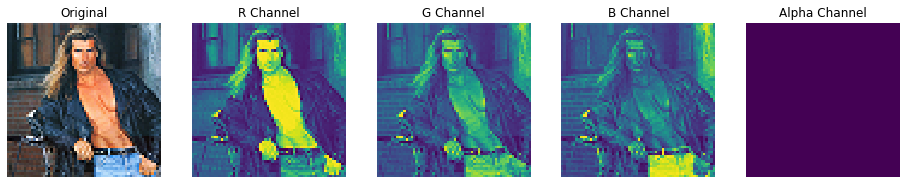

In [14]:
display_pic_rgba(pic=fabio)

### Man kan klart och tydligt se luminanskanalerna i Fabio bilden nu. Inget märkligt, då är det dags för oss att gömma ett meddelande i alfa kanalen!

In [15]:
# Method for displaying image histogram by channel (rgba)
def display_histogram(img,ch):
    """Method that takes in as parameters img(an image) and ch(a channel, 0-3)"""
    
    value = img[:,:,ch].ravel()
    plt.hist(value, bins=128)
    plt.show()

### Bilden nedanför har ett hemligt meddelande, perfekt!

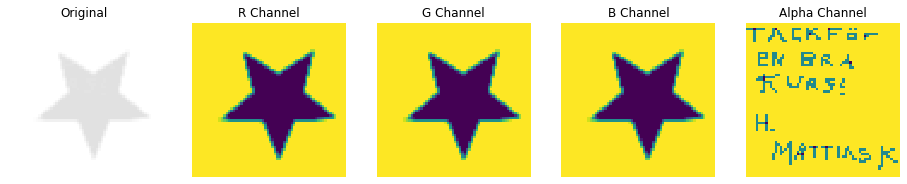

In [16]:
pic_secret = img.imread('fabio_secret_message.png')
pic_secret = np.int_(pic_secret*255)
display_pic_rgba(pic=pic_secret)

### Nu då har vi en bild med ett hemligt meddelande är det dags att ersätter fabios alfakanal med det hemliga meddelandet.

In [17]:
def replace_alpha_channel_values(pic1,pic2):
    """method that replaces alpha channel values with selected source and returns image with new alpha values"""
    p1 = pic1
    p2 = pic2
    #pic = []
    
    # R G B Color channels variables
    r = p1[:,:,0].ravel()
    g = p1[:,:,1].ravel()
    b = p1[:,:,2].ravel()
    a = p2[:,:,3].ravel()
    
    # Using list comprehension to reapply all rgba channels  
    pic = [[k,l,m,n] for k,l,m,n in list(zip(r,g,b,a))]
    pic = np.array(pic)
    
    # Reshaping the data so that the rgba pixels overlay each other.
    pic = pic.reshape(64,64,4)
    
    # Returns a rgba color array
    
    return pic

In [18]:
# Placing a secret message in the alpha channel of teh fabio picture
fabio_with_a_msg= replace_alpha_channel_values(pic1=fabio,pic2=pic_secret)

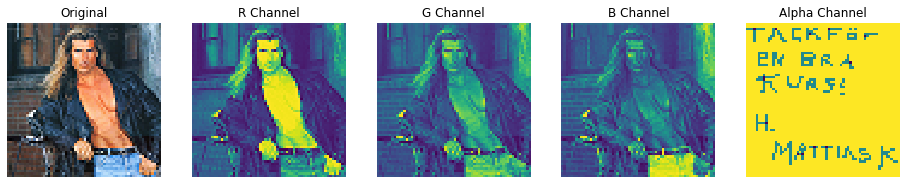

In [19]:
display_pic_rgba(pic=fabio_with_a_msg)

### Tillsist granskar vi histogramvärden på alfakanalen för orginala fabio bilden och den nya fabio bilden med det hemliga värdet. vi kan klart och tydligt urskilja en differans i histogram värden.

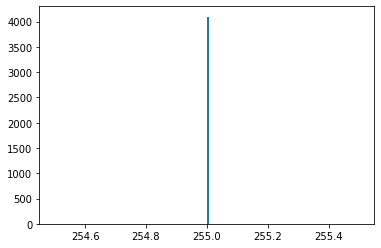

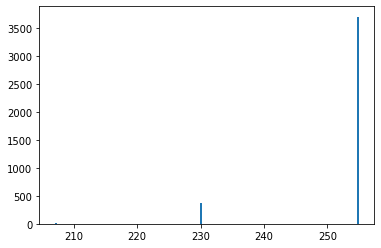

In [20]:
display_histogram(img=fabio,ch=3)
display_histogram(img=fabio_with_a_msg,ch=3)

# By Mattias Kallman 2019